In [1]:
# Import libraries
'''
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
'''

# Pretty display for notebooks
'''
%matplotlib inline
'''

# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

import pickle
import awesome_functions as cf

slack_url = pickle.load(open('slackUrl.pickle', 'rb'))
slack_url

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_test = test.copy()

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


### sunrise, sunset 분석

In [2]:
df_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


#### 1) station별 sunrise_minutes, sunset_minutes 데이터 현황
    - 20개 중 9개 station의 sunrise, sunset 데이터 전무

In [3]:
df_weather_pivot = df_weather.copy()

In [4]:
cf.isThereNoneData(df_weather_pivot)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,20517,0,0.00,0,0.00,0,0.00
1,date,20517,0,0.00,0,0.00,0,0.00
2,tmax,20517,906,4.42,0,0.00,0,0.00
3,tmin,20517,908,4.43,0,0.00,0,0.00
4,tavg,20517,1469,7.16,0,0.00,0,0.00
5,depart,20517,11511,56.10,0,0.00,0,0.00
6,dewpoint,20517,666,3.25,0,0.00,0,0.00
7,wetbulb,20517,1252,6.10,0,0.00,0,0.00
8,heat,20517,1469,7.16,0,0.00,0,0.00
9,cool,20517,1469,7.16,0,0.00,0,0.00


In [5]:
def to_nan(a):
    temp = str(a).strip()
    if temp == 'M' or temp == '-':
        return np.nan
    else:
        return int(a)

In [6]:
# sunrise, sunset의 "M", "-"을 nan값으로 변환
# sunrise, sunset columns만 처리
df_weather_pivot["sunrise"] = df_weather_pivot["sunrise"].apply(to_nan)
df_weather_pivot["sunset"] = df_weather_pivot["sunset"].apply(to_nan)

In [7]:
def isnan(a):
    if np.isnan(a):
        return 0
    else:
        return 1

In [8]:
# pivot을 위해 count 열 추가
df_weather_pivot["sunrise_count"] = df_weather_pivot["sunrise"].apply(isnan)
df_weather_pivot["sunset_count"] = df_weather_pivot["sunset"].apply(isnan)

In [9]:
df_weather_pivot.pivot_table(["sunrise_count", "sunset_count"], ["station_nbr"], aggfunc=np.sum)

,sunrise_count,sunset_count
station_nbr,,
1,0,0
2,1004,1004
3,1004,1004
4,1004,1004
5,821,821
6,1004,1004
7,0,0
8,0,0
9,0,0


#### `>>> sunrise, sunset 데이터가 부분적으로 없는 것이 아니기 때문에 station별 전체 sunrise, sunset를 추측으로 채우기 어렵다`

#### 2) sunrise, sunset 데이터 형태

##### 2-1) sunrise, sunset 정량화된 데이터로 변환

In [10]:
# sunset, sunrise 분석을 위해 정량화 되어있지 않은 column 삭제
drop_ls_dft = ["station_nbr","date", "codesum"]

df_w_drop_dft = df_weather.drop(drop_ls_dft, axis=1)
df_w_drop_dft.tail()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,53,34,44,M,35,41,21,0,-,-,M,0.00,29.90,29.99,4.5,03,5.3
20513,59,34,47,M,32,41,18,0,-,-,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,67,49,58,-4,40,50,7,0,0644,1738,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,45,33,39,-6,24,32,26,0,0624,1646,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,68,50,59,M,39,50,6,0,-,-,0.0,0.00,29.57,30.27,10.5,36,11.2


In [11]:
cf.isThereNoneData(df_w_drop_dft)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,tmax,20517,906,4.42,0,0.00,0,0.00
1,tmin,20517,908,4.43,0,0.00,0,0.00
2,tavg,20517,1469,7.16,0,0.00,0,0.00
3,depart,20517,11511,56.10,0,0.00,0,0.00
4,dewpoint,20517,666,3.25,0,0.00,0,0.00
5,wetbulb,20517,1252,6.10,0,0.00,0,0.00
6,heat,20517,1469,7.16,0,0.00,0,0.00
7,cool,20517,1469,7.16,0,0.00,0,0.00
8,sunrise,20517,0,0.00,0,0.00,9656,47.06
9,sunset,20517,0,0.00,0,0.00,9656,47.06


In [12]:
# sunrise, sunset를 정량화된 값으로 변환하기 위해 "M", "-"을 nan값으로 변환 후 row 삭제
def to_nan(a):
    temp = str(a).strip()
    if temp == 'M' or temp == '-':
        return np.nan
    else:
        return a

In [13]:
# sunrise, sunset columns만 처리
df_w_drop_dft_del_nan = df_w_drop_dft.copy()
df_w_drop_dft_del_nan["sunrise"] = df_w_drop_dft_del_nan["sunrise"].apply(to_nan)
df_w_drop_dft_del_nan["sunset"] = df_w_drop_dft_del_nan["sunset"].apply(to_nan)
df_w_drop_dft_del_nan = df_w_drop_dft_del_nan.dropna()

In [14]:
cf.isThereNoneData(df_w_drop_dft_del_nan)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,tmax,10861,806,7.42,0,0.00,0,0.0
1,tmin,10861,808,7.44,0,0.00,0,0.0
2,tavg,10861,859,7.91,0,0.00,0,0.0
3,depart,10861,1855,17.08,0,0.00,0,0.0
4,dewpoint,10861,540,4.97,0,0.00,0,0.0
5,wetbulb,10861,994,9.15,0,0.00,0,0.0
6,heat,10861,859,7.91,0,0.00,0,0.0
7,cool,10861,859,7.91,0,0.00,0,0.0
8,sunrise,10861,0,0.00,0,0.00,0,0.0
9,sunset,10861,0,0.00,0,0.00,0,0.0


In [15]:
# sunrise, sunset를 정량화된 값(분단위)으로 변환
def getMinutes(a):
    return (float(str(a).strip()[:2]) * 60)+ float(str(a).strip()[2:])

In [16]:
# sunrise_minutes, sunset_minutes 열 생성 및 sunrise, sunset 열 삭제
df_w_with_sunminutes = df_w_drop_dft_del_nan.copy()
df_w_with_sunminutes["sunrise_minutes"] = df_w_with_sunminutes["sunrise"].apply(getMinutes)
df_w_with_sunminutes["sunset_minutes"] = df_w_with_sunminutes["sunset"].apply(getMinutes)
df_w_with_sunminutes = df_w_with_sunminutes.drop(["sunrise","sunset"], axis=1)
df_w_with_sunminutes.tail()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
20507,75,50,63,-2,53,57,2,0,0.0,0.00,29.82,29.85,5.3,30,6.1,400.0,1060.0
20510,60,38,49,-7,31,42,16,0,0.0,0.00,28.98,30.36,11.9,01,12.5,411.0,1057.0
20511,50,32,41,-2,34,38,24,0,0.0,0.00,29.65,30.03,0.3,03,0.6,379.0,1000.0
20514,67,49,58,-4,40,50,7,0,0.0,0.00,29.78,30.28,10.6,36,11.2,404.0,1058.0
20515,45,33,39,-6,24,32,26,0,0.1,0.02,29.51,30.24,20.4,34,20.9,384.0,1006.0


##### 2-2) sunrise_minutes, sunset_minutes을 df_weather에 병합

In [17]:
# index 기준으로 병합을 위해 df_weather의 index를 columns으로 생성
df_weather_index = df_weather.reset_index(drop=False)
df_weather_index.tail()

,index,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,20512,16,2014-10-31,53,34,44,M,35,41,21,...,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,20513,17,2014-10-31,59,34,47,M,32,41,18,...,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,20514,18,2014-10-31,67,49,58,-4,40,50,7,...,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,20515,19,2014-10-31,45,33,39,-6,24,32,26,...,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20516,20,2014-10-31,68,50,59,M,39,50,6,...,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


In [18]:
# index 기준으로 병합을 위해 index를 columns으로 생성 (새 df 생성시 reset_index 안했음)
df_w_with_sunminutes_index = df_w_with_sunminutes.reset_index(drop=False)
df_w_with_sunminutes_index.tail()

,index,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
10856,20507,75,50,63,-2,53,57,2,0,0.0,0.00,29.82,29.85,5.3,30,6.1,400.0,1060.0
10857,20510,60,38,49,-7,31,42,16,0,0.0,0.00,28.98,30.36,11.9,01,12.5,411.0,1057.0
10858,20511,50,32,41,-2,34,38,24,0,0.0,0.00,29.65,30.03,0.3,03,0.6,379.0,1000.0
10859,20514,67,49,58,-4,40,50,7,0,0.0,0.00,29.78,30.28,10.6,36,11.2,404.0,1058.0
10860,20515,45,33,39,-6,24,32,26,0,0.1,0.02,29.51,30.24,20.4,34,20.9,384.0,1006.0


In [19]:
# df_weather_with_sunminutes에서 병합에 필요한 columns만 남김
df_w_with_sunminutes_index_re = df_w_with_sunminutes_index[["index","sunrise_minutes","sunset_minutes"]]
df_w_with_sunminutes_index_re.tail()

,index,sunrise_minutes,sunset_minutes
10856,20507,400.0,1060.0
10857,20510,411.0,1057.0
10858,20511,379.0,1000.0
10859,20514,404.0,1058.0
10860,20515,384.0,1006.0


In [20]:
# df_weather에 sunrise_minutes, sunset_minutes 병합 (sunrise, sunset 포함)
df_weather_with_sunminutes = df_weather_index.merge(df_w_with_sunminutes_index_re, on="index", how="outer" )
df_weather_with_sunminutes.tail()

,index,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
20512,20512,16,2014-10-31,53,34,44,M,35,41,21,...,,M,0.00,29.90,29.99,4.5,03,5.3,NaN,NaN
20513,20513,17,2014-10-31,59,34,47,M,32,41,18,...,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,NaN,NaN
20514,20514,18,2014-10-31,67,49,58,-4,40,50,7,...,,0.0,0.00,29.78,30.28,10.6,36,11.2,404.0,1058.0
20515,20515,19,2014-10-31,45,33,39,-6,24,32,26,...,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,384.0,1006.0
20516,20516,20,2014-10-31,68,50,59,M,39,50,6,...,,0.0,0.00,29.57,30.27,10.5,36,11.2,NaN,NaN


In [21]:
cf.isThereNoneData(df_weather_with_sunminutes)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,index,20517,0,0.00,0,0.00,0,0.00
1,station_nbr,20517,0,0.00,0,0.00,0,0.00
2,date,20517,0,0.00,0,0.00,0,0.00
3,tmax,20517,906,4.42,0,0.00,0,0.00
4,tmin,20517,908,4.43,0,0.00,0,0.00
5,tavg,20517,1469,7.16,0,0.00,0,0.00
6,depart,20517,11511,56.10,0,0.00,0,0.00
7,dewpoint,20517,666,3.25,0,0.00,0,0.00
8,wetbulb,20517,1252,6.10,0,0.00,0,0.00
9,heat,20517,1469,7.16,0,0.00,0,0.00


In [23]:
len(df_weather_with_sunminutes)

20517

In [28]:
cf.remove_m_row(df_weather_with_sunminutes, ["sunrise_minutes", "sunset_minutes"])

원본 데이터프레임 length : 20517
제거하고 싶은 컬럼 : ['sunrise_minutes', 'sunset_minutes']
제거한 int 컬럼 : []
제거한 float 컬럼 : []
제거한 후 데이터프레임 length : 10861


,index,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
1,1,2,2012-01-01,48,33,41,16,37,39,24,...,RA,0.0,0.07,28.82,29.91,9.1,23,11.3,436.0,986.0
2,2,3,2012-01-01,55,34,45,9,24,36,20,...,,0.0,0.00,29.77,30.47,9.9,31,10.0,455.0,1040.0
3,3,4,2012-01-01,63,47,55,4,28,43,10,...,,0.0,0.00,29.79,30.48,8.0,35,8.2,448.0,1062.0
4,4,6,2012-01-01,63,34,49,0,31,43,16,...,,0.0,0.00,29.95,30.47,14.0,36,13.8,447.0,1062.0
8,8,10,2012-01-01,73,53,63,M,55,58,2,...,FG+ FG BR,M,0.00,30.16,30.19,5.1,24,5.5,443.0,1058.0
9,9,11,2012-01-01,72,48,60,7,54,56,5,...,FG+ FG BR,0.0,0.00,30.15,30.18,4.6,23,4.8,444.0,1057.0
12,12,14,2012-01-01,50,34,42,5,25,35,23,...,,0.0,0.00,29.13,30.52,11.4,32,11.3,459.0,1049.0
13,13,15,2012-01-01,48,26,37,16,35,38,28,...,RA FG+ FZFG BR,0.0,0.09,29.53,29.89,2.5,17,3.8,438.0,981.0
16,16,18,2012-01-01,59,40,50,4,28,40,15,...,,0.0,0.00,29.98,30.49,9.0,33,8.9,450.0,1052.0
17,17,19,2012-01-01,38,25,32,10,26,30,33,...,RA SN BR,0.5,0.12,29.06,29.79,14.6,29,15.6,443.0,988.0


##### 2-3) 데이터 형태 파악

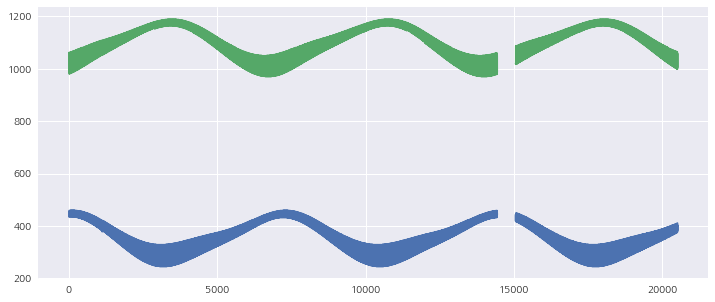

In [22]:
# index순서(date순서)에 따른 sunrise, sunset 크기 변화
plt.figure(figsize=(12, 5))
plt.plot(df_weather_with_sunminutes[["sunrise_minutes", "sunset_minutes"]])
plt.show()

#### `>>> 데이터에 패턴이 있으므로 sunrise, sunset 데이터가 전혀 없는 station도 채울 수는 있지만 나중에 하자..`

In [ ]:
model = sm.OLS.from_formula("units ~ C(item_nbr):sunrise_minutes + 0", data=df_weather_with_sunminutes)
print(model.fit().summary())

In [31]:
df_train_key = df_train.merge(df_key, on=["store_nbr"], how='inner')

In [32]:
df_train_key.tail()

,date,store_nbr,item_nbr,units,station_nbr
4617595,2014-10-31,35,107,0,5
4617596,2014-10-31,35,108,0,5
4617597,2014-10-31,35,109,0,5
4617598,2014-10-31,35,110,0,5
4617599,2014-10-31,35,111,0,5
